In [1]:
import cptac
import seaborn as sns #can plot something later on
import pandas as pd

In [2]:
cptac.download(dataset="Endometrial")

True

In [3]:
endom = cptac.Endometrial()

In [4]:
endom.list_data()

Below are the dataframes contained in this dataset:
	acetylproteomics
		Dimensions: (144, 10862)
	circular_RNA
		Dimensions: (109, 4945)
	clinical
		Dimensions: (144, 26)
	CNV
		Dimensions: (95, 28057)
	derived_molecular
		Dimensions: (144, 125)
	experimental_design
		Dimensions: (144, 26)
	miRNA
		Dimensions: (99, 2337)
	phosphoproteomics
		Dimensions: (144, 73212)
	phosphoproteomics_gene
		Dimensions: (144, 8466)
	proteomics
		Dimensions: (144, 10999)
	somatic_mutation
		Dimensions: (52560, 3)
	somatic_mutation_binary
		Dimensions: (95, 51559)
	transcriptomics
		Dimensions: (109, 28057)


In [5]:
df_prot = endom.get_proteomics()
df_prot.head()

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,-0.664,...,-0.08770,NaN,0.0229,0.1090,NaN,-0.332,-0.43300,-1.020,-0.1230,-0.0859
S002,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,-0.367,...,-0.03560,NaN,0.3630,1.0700,0.737,-0.564,-0.00461,-1.130,-0.0757,-0.4730
S003,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,-0.500,...,0.00112,-0.1450,0.0105,-0.1160,NaN,0.151,-0.07400,-0.540,0.3200,-0.4190
S005,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,-0.223,...,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.398,-0.07520,-0.797,-0.0301,-0.4670
S006,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,-0.101,...,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.646,0.20700,-1.850,-0.1760,0.0513


In [6]:
df_prot[["A2ML1","A4GALT"]]

Name,A2ML1,A4GALT
Sample_ID,,
S001,-0.8020,0.222
S002,-0.6840,0.984
S003,0.4350,NaN
S005,-0.4430,0.243
S006,-0.5370,0.311
...,...,...
S149,1.9300,NaN
S150,-0.2910,NaN
S151,-0.0229,NaN


In [26]:
f = open('../data/filtered_genes_list.txt', 'r')
x = f.readlines()
f.close()

In [27]:
# x

In [28]:
genes = []

for i in range(len(x)):
    genes.append(x[i].rstrip('\n'))

#genes

In [29]:
subsetData = df_prot[df_prot.columns.intersection(genes)]

In [30]:
subsetData.head()

Name,ADGRE5,ADGRG1,ALDH1A1,ARRDC1,BAG2,C7,CALB2,CAPS,CD34,CD59,...,TRIM68,TSR2,TTR,TTYH3,TUBA1B,UBE2Z,USP1,VCAN,VCL,WDR73
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,-0.549,-0.101,-0.318,0.118,-1.360,-0.840,0.120,1.270,-1.240,0.306,...,-0.1000,-0.2800,-1.040,0.322,-0.409,-0.05320,-0.0276,0.271,-0.811,-0.068
S002,-1.670,1.040,-2.300,0.458,-0.303,-0.236,-2.390,2.490,-0.812,-0.429,...,1.0600,0.0666,-1.220,1.060,-0.395,-0.00727,0.2920,0.635,-0.674,0.513
S003,-0.239,0.338,1.020,-0.242,-0.471,-0.610,0.205,1.900,-0.471,0.308,...,-0.0822,-0.2290,-0.778,0.606,-0.425,0.14900,-0.0100,-1.100,-0.345,0.795
S005,-0.684,0.478,-0.630,0.161,-1.090,-1.290,-0.765,0.758,-0.211,-0.610,...,-0.1780,0.0563,-1.700,0.383,-0.350,-0.06220,-0.2950,-1.330,-0.812,0.251
S006,0.239,0.944,-2.050,0.774,-1.610,-0.546,-1.480,-0.845,-2.010,-0.872,...,-1.2200,0.0202,-0.689,0.227,-0.212,-0.15400,0.1430,-0.240,-1.990,-0.184


In [31]:
subsetData.corr()

Name,ADGRE5,ADGRG1,ALDH1A1,ARRDC1,BAG2,C7,CALB2,CAPS,CD34,CD59,...,TRIM68,TSR2,TTR,TTYH3,TUBA1B,UBE2Z,USP1,VCAN,VCL,WDR73
Name,,,,,,,,,,,,,,,,,,,,,
ADGRE5,1.000000,-0.506508,0.597081,-0.297391,0.688299,0.658706,0.181021,-0.612832,0.667698,0.112700,...,0.212486,0.465552,0.513120,-0.679014,0.481758,0.223605,-0.158986,0.407957,0.832497,0.022325
ADGRG1,-0.506508,1.000000,-0.490375,0.256759,-0.412400,-0.527884,-0.159188,0.357764,-0.521071,-0.035965,...,-0.321562,-0.303592,-0.381641,0.559731,-0.272162,-0.335606,0.167688,-0.258209,-0.520818,-0.147769
ALDH1A1,0.597081,-0.490375,1.000000,-0.293685,0.569847,0.690029,0.237054,-0.499268,0.712009,0.205216,...,0.355828,0.437542,0.508678,-0.553105,0.352101,0.148374,-0.199424,0.307190,0.670830,0.125210
ARRDC1,-0.297391,0.256759,-0.293685,1.000000,-0.298560,-0.303601,-0.223700,0.408898,-0.344230,-0.019056,...,-0.023033,-0.259701,-0.196012,0.204968,-0.215327,0.057500,-0.035619,-0.325175,-0.351455,-0.091499
BAG2,0.688299,-0.412400,0.569847,-0.298560,1.000000,0.582911,0.209587,-0.438833,0.654788,0.052176,...,0.309631,0.337294,0.449623,-0.534905,0.380274,0.210200,-0.107272,0.433697,0.852221,0.040881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2Z,0.223605,-0.335606,0.148374,0.057500,0.210200,0.248074,0.070729,-0.003334,0.269241,0.134050,...,0.198153,0.327957,0.141549,-0.313508,0.041305,1.000000,-0.034434,0.170948,0.247395,0.148535
USP1,-0.158986,0.167688,-0.199424,-0.035619,-0.107272,-0.045731,0.231253,-0.059515,-0.200883,-0.341751,...,-0.223279,-0.061607,0.034661,0.101019,0.137975,-0.034434,1.000000,0.139074,-0.178923,0.137216
VCAN,0.407957,-0.258209,0.307190,-0.325175,0.433697,0.466384,0.435276,-0.502315,0.485904,0.092291,...,0.035870,0.333554,0.329343,-0.174915,0.325722,0.170948,0.139074,1.000000,0.509060,0.124927


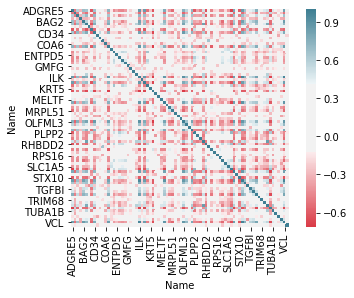

In [35]:
cmap = sns.diverging_palette(10, 220, sep=80, as_cmap=True)
sns.heatmap(subsetData.corr(), cmap=cmap, square=True)

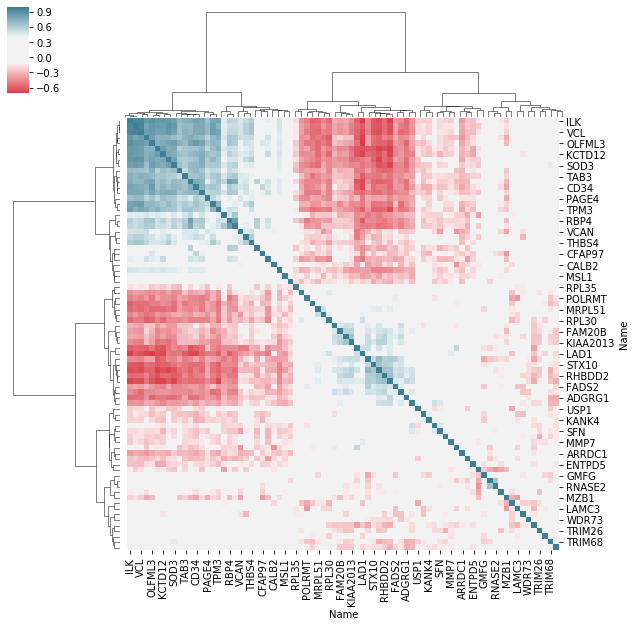

In [36]:
sns.clustermap(subsetData.corr(), cmap=cmap, square=True, method='ward', metric='euclidean')